In [8]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os


In [2]:
# Load the event file
ea = event_accumulator.EventAccumulator("events.out.tfevents.1742665059.DESKTOP-RP3J70O.26992.0")
ea.Reload()

# Print all scalar tags (things you can plot)
print("Available tags:", ea.Tags()["scalars"])



Available tags: ['Policy/Entropy', 'Policy/Extrinsic Value Estimate', 'Losses/Policy Loss', 'Losses/Value Loss', 'Policy/Learning Rate', 'Policy/Epsilon', 'Policy/Beta', 'Environment/Episode Length', 'Environment/Cumulative Reward', 'Policy/Extrinsic Reward']


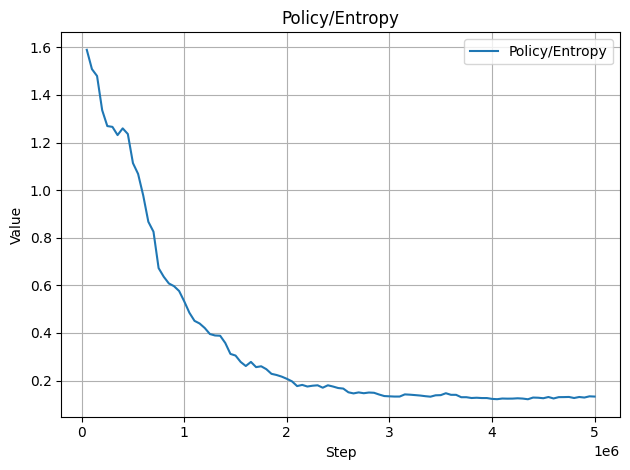

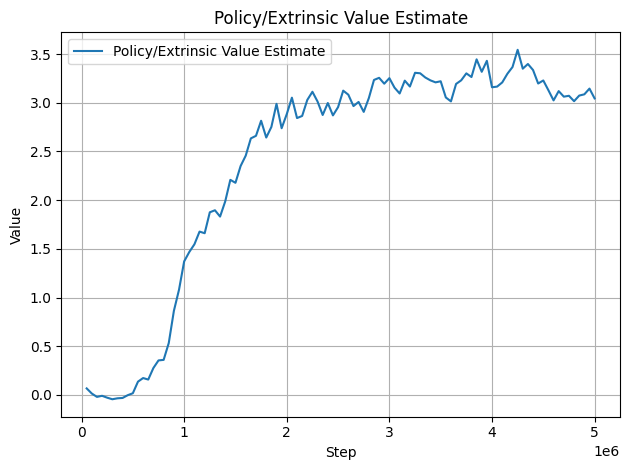

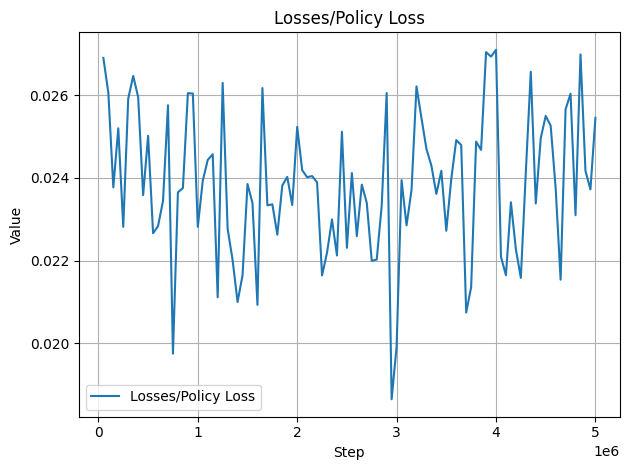

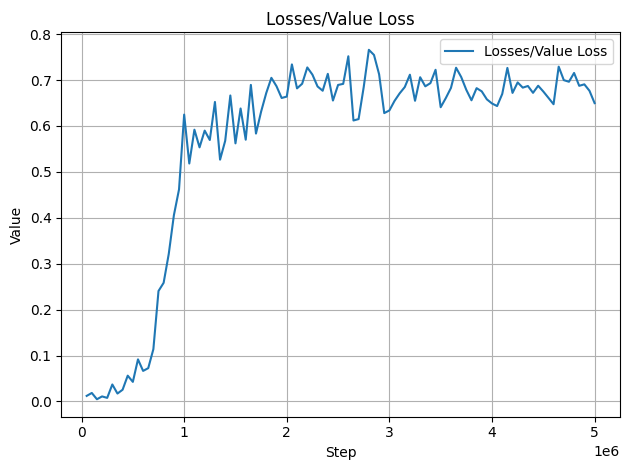

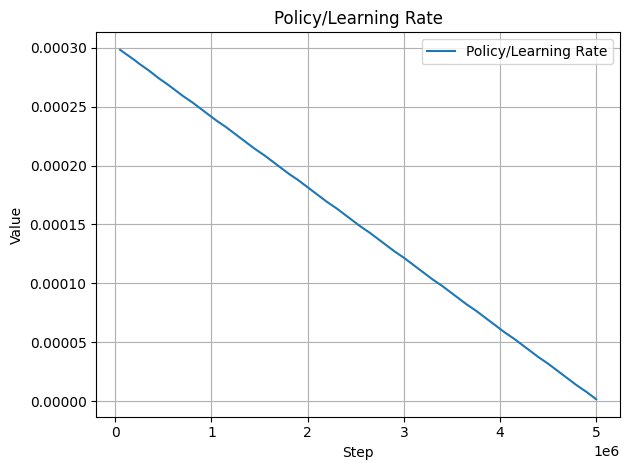

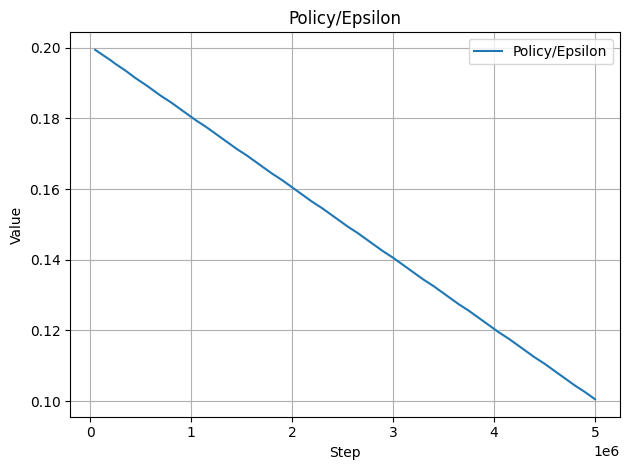

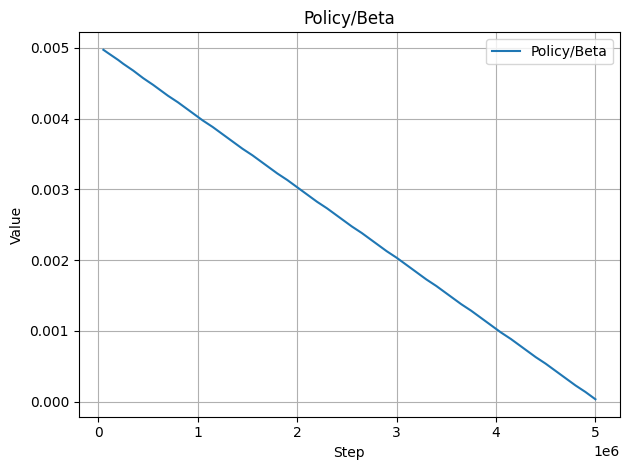

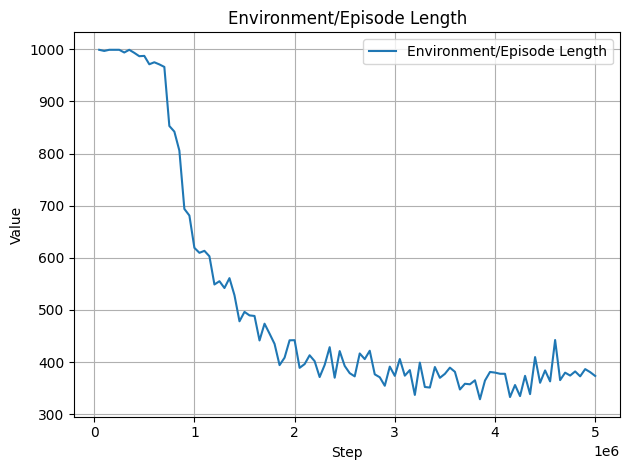

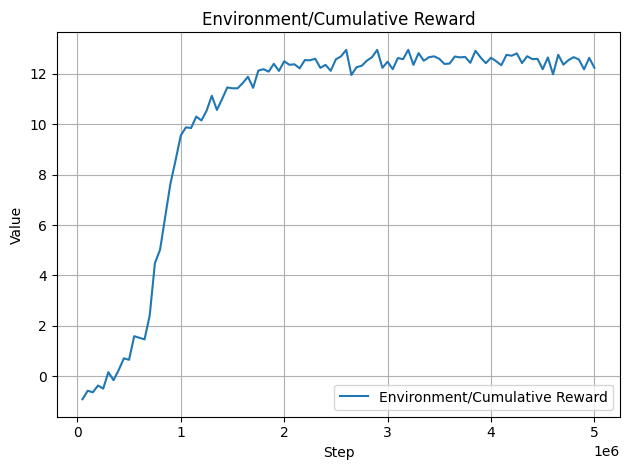

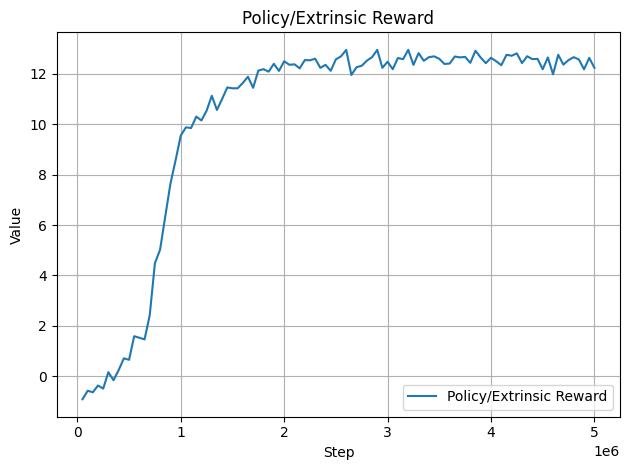

In [10]:
for tag in ea.Tags()["scalars"]:
    events = ea.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]

    plt.figure()
    plt.plot(steps, values, label=tag)
    plt.xlabel("Step")
    plt.ylabel("Value")
    plt.title(tag)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    safe_tag = tag.replace("/", "_")
    save_path = os.path.join('Tensorboard_figs/', f"{safe_tag}.png")
    plt.savefig(save_path)
    plt.show()
